In [60]:
data=pd.read_csv("Project1.csv")

In [61]:
data

,Flight,Status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,Alaska,on time,497,221,212,503,1841
1,NaN,delayed,62,12,20,102,305
2,AM West,on time,694,4840,383,320,201
3,NaN,delayed,117,415,65,129,61


In [62]:
data = data.ffill(axis=0)

In [64]:
data = data.set_index(['Flight','Status'])

In [69]:
data.xs('delayed',level='Status')

,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
Flight,,,,,
Alaska,62,12,20,102,305
AM West,117,415,65,129,61


In [71]:
data

Los Angeles  Phoenix  San Diego  San Francisco  Seattle
Flight  Status                                                          
Alaska  on time          497      221        212            503     1841
        delayed           62       12         20            102      305
AM West on time          694     4840        383            320      201
        delayed          117      415         65            129       61

In [77]:
new_data = data.xs('delayed',level='Status').T

In [89]:
new_data

Flight,Alaska,AM West,Variance % in Delay
Los Angeles,62,117,47.008547
Phoenix,12,415,97.108434
San Diego,20,65,69.230769
San Francisco,102,129,20.930233
Seattle,305,61,-400.000000


In [88]:
new_data['Variance % in Delay']=((new_data.loc[:,'AM West'] - new_data.loc[:,'Alaska'])/new_data.loc[:,'AM West'])*100 

In [90]:
new_data['Total Variance'] = new_data.loc[:,'AM West'] - new_data.loc[:,'Alaska']

In [120]:
new_data = new_data.rename_axis(index=('Cities'))

In [121]:
new_data.mean(axis=0)

Flight
Alaska                 100.200000
AM West                157.400000
Variance % in Delay    -33.144403
Total Variance          57.200000
dtype: float64

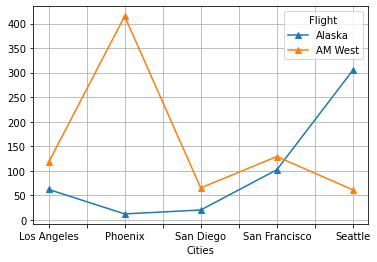

In [133]:
import matplotlib.pyplot as plt
new_data.plot(y=["Alaska","AM West"],kind="line",grid=True,marker="^")